# 고양이 수염 스티커 만들기

## 얼굴 검출 & 랜드마크 검출하기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

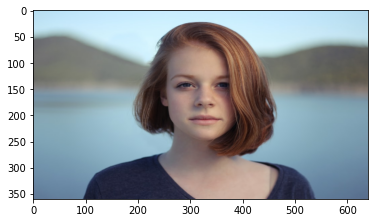

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image5.jpeg'
img_bgr = cv2.imread(my_image_path) #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))# 640x360의 크기로 Resize
img_bgr_org = img_bgr.copy()
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

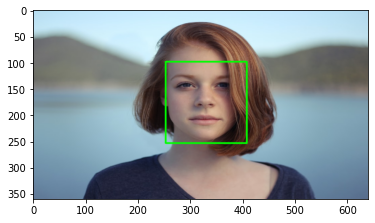

In [3]:
# 얼굴 검출하기
detector_hog = dlib.get_frontal_face_detector() #hog detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

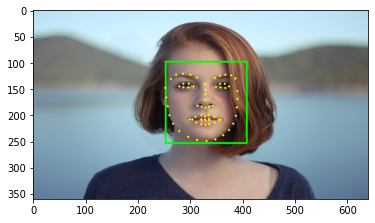

In [4]:
#얼굴 랜드마크
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) #연두색

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기 

### 스티커 위치 및 크기 계산

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 수염은 조금 더 아래 붙이는게 자연스러워 33으로 정함. 
    x = landmark[33][0]
    y = landmark[33][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(329, 186)
(x,y) : (329,186)
(w,h) : (156,156)


### 스티커 resize & 좌표조정

(156, 156, 3)


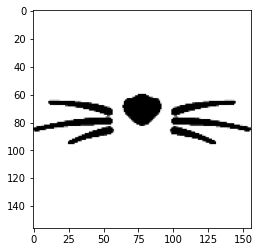

In [6]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [7]:
refined_x = x - w // 2 # left
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (251,108)


In [8]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(156, 156, 3)
(x,y) : (251,108)


### 스티커 붙이기

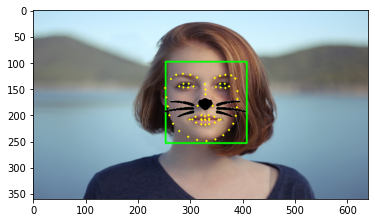

In [9]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

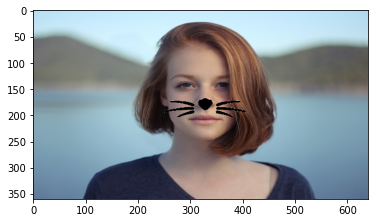

In [10]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

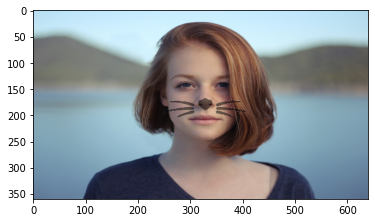

In [11]:
# addweighted를 사용해 수염을 조금 더 자연스럽게 붙이기
sticker_area = img_bgr_org[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr_org[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr_org, cv2.COLOR_BGR2RGB))
plt.show()

## 문제점 찾아보기

### 다양한 이미지 테스트

### 옆모습

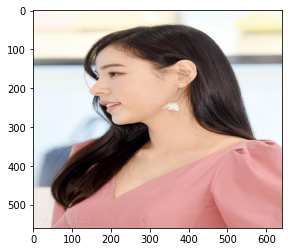

In [12]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/side.jpeg'
img_bgr = cv2.imread(my_image_path) #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 560))# 640x360의 크기로 Resize
img_bgr_org = img_bgr.copy()
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

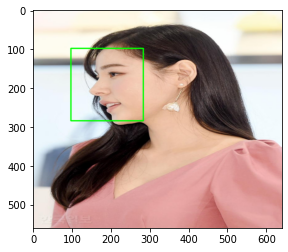

In [13]:
# 얼굴 검출하기
detector_hog = dlib.get_frontal_face_detector() #hog detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

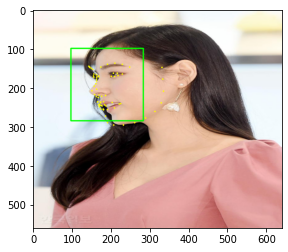

In [14]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) #연두색

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 수염은 조금 더 아래 붙이는게 자연스러워 33으로 정함. 
    x = landmark[33][0]
    y = landmark[33][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(167, 224)
(x,y) : (167,224)
(w,h) : (187,187)


In [16]:
refined_x = x - w // 2 # left
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (74,131)
(156, 156, 3)
(x,y) : (74,131)


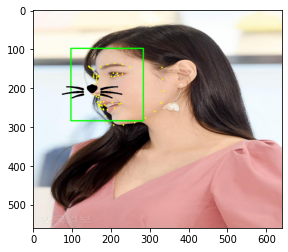

In [17]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

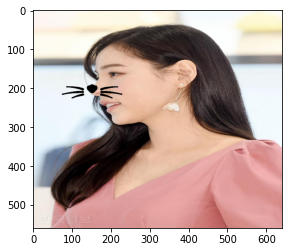

In [18]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 어두운 사진

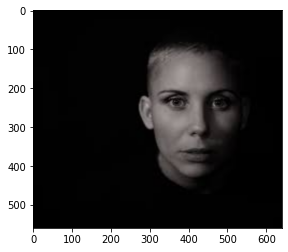

In [19]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/dark.jpeg'
img_bgr = cv2.imread(my_image_path) #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 560))# 640x360의 크기로 Resize
img_bgr_org = img_bgr.copy()
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

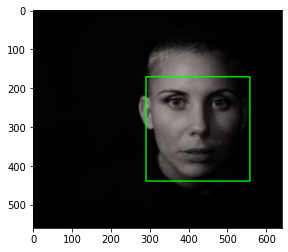

In [20]:
detector_hog = dlib.get_frontal_face_detector() #hog detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

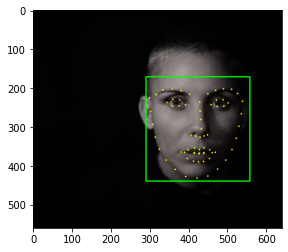

In [21]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) #연두색

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 수염은 조금 더 아래 붙이는게 자연스러워 33으로 정함. 
    x = landmark[33][0]
    y = landmark[33][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

refined_x = x - w // 4 # left
refined_y = y - h // 3
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))

(429, 326)
(x,y) : (429,326)
(w,h) : (268,268)
refined (x,y) : (362,237)
(156, 156, 3)
refined (x,y) : (362,237)


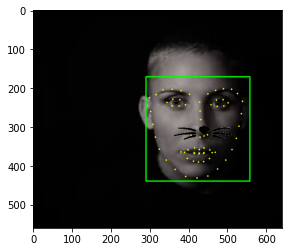

In [23]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

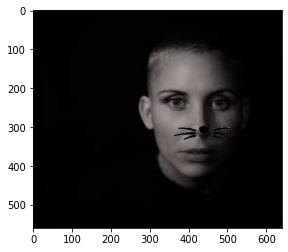

In [24]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고록

1. **얼굴 각도**에 따른 스티커 변화
    - 가설: 얼굴 각도가 변할 때, 스티커의 각도도 변해야 한다. 
    - 필요한 것: 스티커의 위치에 대한 벡터 연산
    - 현실 : 어떠한 방식으로 스티커의 각도를 돌려야 할지 구상은 했으나, opencv에 대한 이해 부족 + 수학 지식의 짧음으로 인해 구현은 하지 못함. 
    
    
2. **옆모습**
    - 가설: 모델은 정면을 바라봐야 구현이 잘 될 것이다. 
    - 현실: face detection이 옆모습도 매우 잘 됨. 하지만 스티커 각도를 어떠한 방식으로 변환해야 할 지 몰라 가운데에 붙임. 
    - 인사이트: 모델이 무조건적으로 정면만을 요구하지는 않는다. 


3. **어두운 사진**
    - 가설 : 오른쪽 윤곽이 보이지 않아 제대로 face detection을 하지 못할 것이다.
    - 현실 : 굉장히 얼굴을 잘 잡아냈다. 안보이는 윤곽까지 유추해 점이 찍힘. 
    - 인사이트:얼굴의 반 이상이 이목구비가 굉장히 뚜렷하게 보인다는 점을 간과해 결과를 섣불리 예측했다. 어느정도 이상으로 이목구비가 뚜렷하게 보인다면 어두운 사진이라도 잘 detect할 수 있다. 


### 느낀 점

- opencv를 처음 다뤄봐서 너무 어려웠다. 사실 이미지가 어떤 방식으로 변환되는 지에 대한 기본지식이 없는 상태에서 과제를 수행하려니 너무 어려웠다. 

- 그럼에도 불구하고, 내가 생각했던 것 이상으로 face detection이 다양한 상황에서도 이루어져서 신기했다. 옆모습, 이목구비가 잘 안보이는 사진이더라도 face detection이 제대로 수행되어 내 기존의 상식을 깼던 과제였다. 

- 추후 다른 cv 과제를 수행하기 위해서는 어떠한 방법으로 위치를 계산하는 지에 대한 벡터 연산에 대한 이해가 필요할 것 같다. 
- 똑같은 과정을 반복적으로 수행하는데에 있어, 아직 클래스를 사용하는 것이 익숙하지 않아 코드를 박아 넣었지만, 이렇게 해보니 클래스와 함수가 얼마나 중요한 역할을 하는지 몸소 깨달았다. 앞으로 이렇게 반복적인 작업을 할 때에, 클래스로 구성해서 과제를 수행해보아야 겠다. 